In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\my_projects\sentiment-analysis-project\artifacts\sentiment_analysis.csv")

In [6]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [7]:
data.shape

(7920, 3)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
import re
#regular expression
import string

In [11]:
#convert upppercase to lowercase
data['tweet']= data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [12]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
#remove links
data['tweet']= data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [14]:
data['tweet'].head()


0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#remove punctuations
def remove_punctutions(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation,'')
    return text
    
data['tweet'] = data['tweet'].apply(remove_punctutions)


In [17]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [18]:
#remove numbers
data['tweet'] = data['tweet'].str.replace('\d+', '', regex=True)

In [19]:
data.tail()

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [22]:
#reove stopwords
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import os
import nltk

# Define the path
download_path = r"C:\Users\ADMIN\Desktop\my_projects\sentiment-analysis-project\static\model"

# Create directory if it doesn't exist
os.makedirs(download_path, exist_ok=True)

# Download stopwords
nltk.download('stopwords', download_dir=download_path)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\Desktop\my_projects\sentiment-analysis-
[nltk_data]     project\static\model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
with open(r"C:\Users\ADMIN\Desktop\my_projects\sentiment-analysis-project\static\model\corpora\stopwords\english",'r')as f:
    sw= f.read().splitlines()

In [25]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [26]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [27]:
#stemming
from nltk.stem import PorterStemmer
ps= PorterStemmer()

In [28]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [29]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [30]:
from collections import Counter
vocab=Counter()

In [31]:
vocab

Counter()

In [32]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [33]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [34]:
len(vocab)

15949

In [35]:
data.shape

(7920, 3)

In [36]:
tokens = [key for key in vocab if vocab[key]>10]

In [37]:
len(tokens)

1145

In [38]:
def save_vocab(lines, filename):
    data= '\n'.join(lines)
    file = open(filename,'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocab(tokens,r"C:\Users\ADMIN\Desktop\sentiment-analysis-project\static\model\vocabulary.txt")  

In [39]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


In [40]:
x= data['tweet']
y=data['label']

In [41]:
from sklearn.model_selection import train_test_split
x_train,  x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [42]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
x_train.shape

(6336,)

In [44]:
x_test.shape

(1584,)

In [45]:
y_test.shape

(1584,)

In [46]:
#vectorization
def vectorizer(ds, vocabulary):
    vectorized_list=[]
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))
        for i in range (len(vocabulary)):
           if vocabulary[i] in sentence.split():
              sentence_list[i]=1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray( vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [47]:
vectorized_x_train = vectorizer(x_train,tokens)

In [48]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
vectorized_x_test = vectorizer(x_test,tokens)

In [50]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
y_train.value_counts()

label
0    4711
1    1625
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x205745d5330>,
 [Text(-0.7618453958694119, 0.7934680792524543, 'positive'),
  Text(0.76184584359154, -0.7934676493734921, 'negative')])

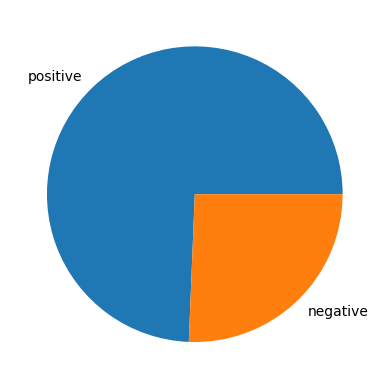

In [52]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['positive','negative'])

In [53]:
#handle imbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9422, 1145) (9422,)


In [54]:
!pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
y_train_smote.value_counts()

label
0    4711
1    4711
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2057cd6a1d0>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'positive'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'negative')])

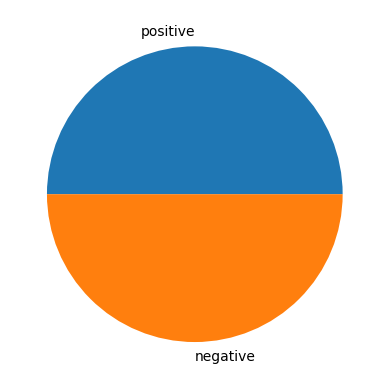

In [56]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['positive','negative'])

In [57]:
#for train= vectorized_x_train_smote, y_train_smote
#fr test = vectorized_x_test, y_test

In [58]:
#model training and rvaluation

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def training_score(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round( precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'training scores:\n\taccuracy={acc}\n\tprsicision={pr}\n\trecall={rec}\n\tf1 score={f1}')

def validation_score(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round( precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'testing scores:\n\taccuracy={acc}\n\tprsicision={pr}\n\trecall={rec}\n\tf1 score={f1}')    

In [61]:
###logistic regression

In [73]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_x_train_smote)
training_score(y_train_smote, y_train_pred)
y_test_pred = lr.predict(vectorized_x_test)
validation_score(y_test,y_test_pred)

training scores:
	accuracy=0.942
	prsicision=0.92
	recall=0.968
	f1 score=0.943
testing scores:
	accuracy=0.864
	prsicision=0.689
	recall=0.845
	f1 score=0.759


In [74]:
##naive bays
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = mnb.predict(vectorized_x_train_smote)
training_score(y_train_smote, y_train_pred)
y_test_pred = mnb.predict(vectorized_x_test)
validation_score(y_test,y_test_pred)

training scores:
	accuracy=0.909
	prsicision=0.872
	recall=0.958
	f1 score=0.913
testing scores:
	accuracy=0.86
	prsicision=0.66
	recall=0.92
	f1 score=0.769


In [75]:
##decision tree 
dtc = DecisionTreeClassifier()
dtc.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = dtc.predict(vectorized_x_train_smote)
training_score(y_train_smote, y_train_pred)
y_test_pred = dtc.predict(vectorized_x_test)
validation_score(y_test,y_test_pred)

training scores:
	accuracy=1.0
	prsicision=1.0
	recall=1.0
	f1 score=1.0
testing scores:
	accuracy=0.812
	prsicision=0.627
	recall=0.633
	f1 score=0.63


In [76]:
##random forest
rfc = RandomForestClassifier()
rfc.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = rfc.predict(vectorized_x_train_smote)
training_score(y_train_smote, y_train_pred)
y_test_pred = rfc.predict(vectorized_x_test)
validation_score(y_test,y_test_pred)

training scores:
	accuracy=1.0
	prsicision=1.0
	recall=1.0
	f1 score=1.0
testing scores:
	accuracy=0.865
	prsicision=0.747
	recall=0.706
	f1 score=0.726


In [77]:
##svm
svc = SVC()
svc.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = svc.predict(vectorized_x_train_smote)
training_score(y_train_smote, y_train_pred)
y_test_pred = svc.predict(vectorized_x_test)
validation_score(y_test,y_test_pred)

training scores:
	accuracy=0.979
	prsicision=0.963
	recall=0.997
	f1 score=0.98
testing scores:
	accuracy=0.867
	prsicision=0.717
	recall=0.788
	f1 score=0.751


In [78]:
#model save
import pickle
with open(r"C:\Users\ADMIN\Desktop\my_projects\sentiment-analysis-project\static\model\model.pickle",'wb')as file:
    pickle.dump(lr,file)